In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, Normalizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Marketing_Campaign_Dataset.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1,1978,Master,Single,491796.22,1,0,2013-12-26,31,1364,...,14,1,1,0,0,0,0,3,11,1
1,2,1974,Master,Married,513926.78,1,0,2014-05-04,23,1275,...,5,1,1,0,0,0,0,3,11,1
2,3,1972,Graduation,Alone,521309.22,2,2,2013-02-15,93,62,...,1,1,0,0,0,1,0,3,11,1
3,4,1911,PhD,YOLO,231628.91,1,0,2013-06-12,13,251,...,14,0,1,1,0,1,0,3,11,0
4,5,1931,2n Cycle,Divorced,223936.10,1,1,2013-05-30,65,670,...,13,1,0,0,1,1,0,3,11,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100279 entries, 0 to 100278
Data columns (total 29 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   100279 non-null  int64  
 1   Year_Birth           100279 non-null  int64  
 2   Education            100279 non-null  object 
 3   Marital_Status       100279 non-null  object 
 4   Income               100279 non-null  float64
 5   Kidhome              100279 non-null  int64  
 6   Teenhome             100279 non-null  int64  
 7   Dt_Customer          100279 non-null  object 
 8   Recency              100279 non-null  int64  
 9   MntWines             100279 non-null  int64  
 10  MntFruits            100279 non-null  int64  
 11  MntMeatProducts      100279 non-null  int64  
 12  MntFishProducts      100279 non-null  int64  
 13  MntSweetProducts     100279 non-null  int64  
 14  MntGoldProds         100279 non-null  int64  
 15  NumDealsPurchases

In [4]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.nunique()

ID                     100279
Year_Birth                103
Education                   5
Marital_Status              8
Income                 100209
Kidhome                     3
Teenhome                    3
Dt_Customer               663
Recency                    99
MntWines                 1493
MntFruits                 199
MntMeatProducts          1725
MntFishProducts           259
MntSweetProducts          263
MntGoldProds              362
NumDealsPurchases          15
NumWebPurchases            27
NumCatalogPurchases        28
NumStorePurchases          13
NumWebVisitsMonth          20
AcceptedCmp3                2
AcceptedCmp4                2
AcceptedCmp5                2
AcceptedCmp1                2
AcceptedCmp2                2
Complain                    2
Z_CostContact               1
Z_Revenue                   1
Response                    2
dtype: int64

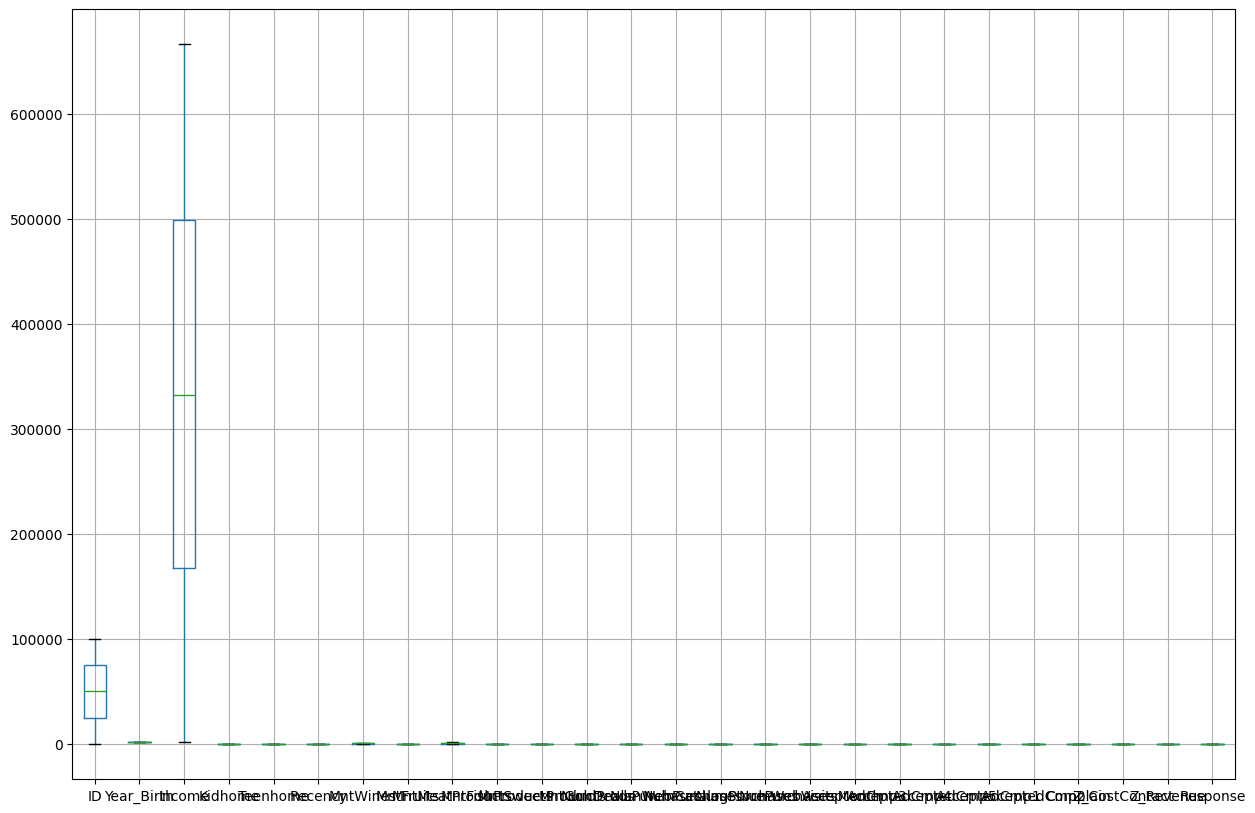

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))
df.boxplot(ax=ax);

In [9]:
object_cols = []
float_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        object_cols.append(col)
    elif df[col].dtype == 'float64':
        float_cols.append(col)
print('Number of onjects', len(object_cols))
print('Number of floats', len(float_cols))


Number of onjects 3
Number of floats 1


In [10]:
object_cols

['Education', 'Marital_Status', 'Dt_Customer']

In [12]:
float_cols

['Income']

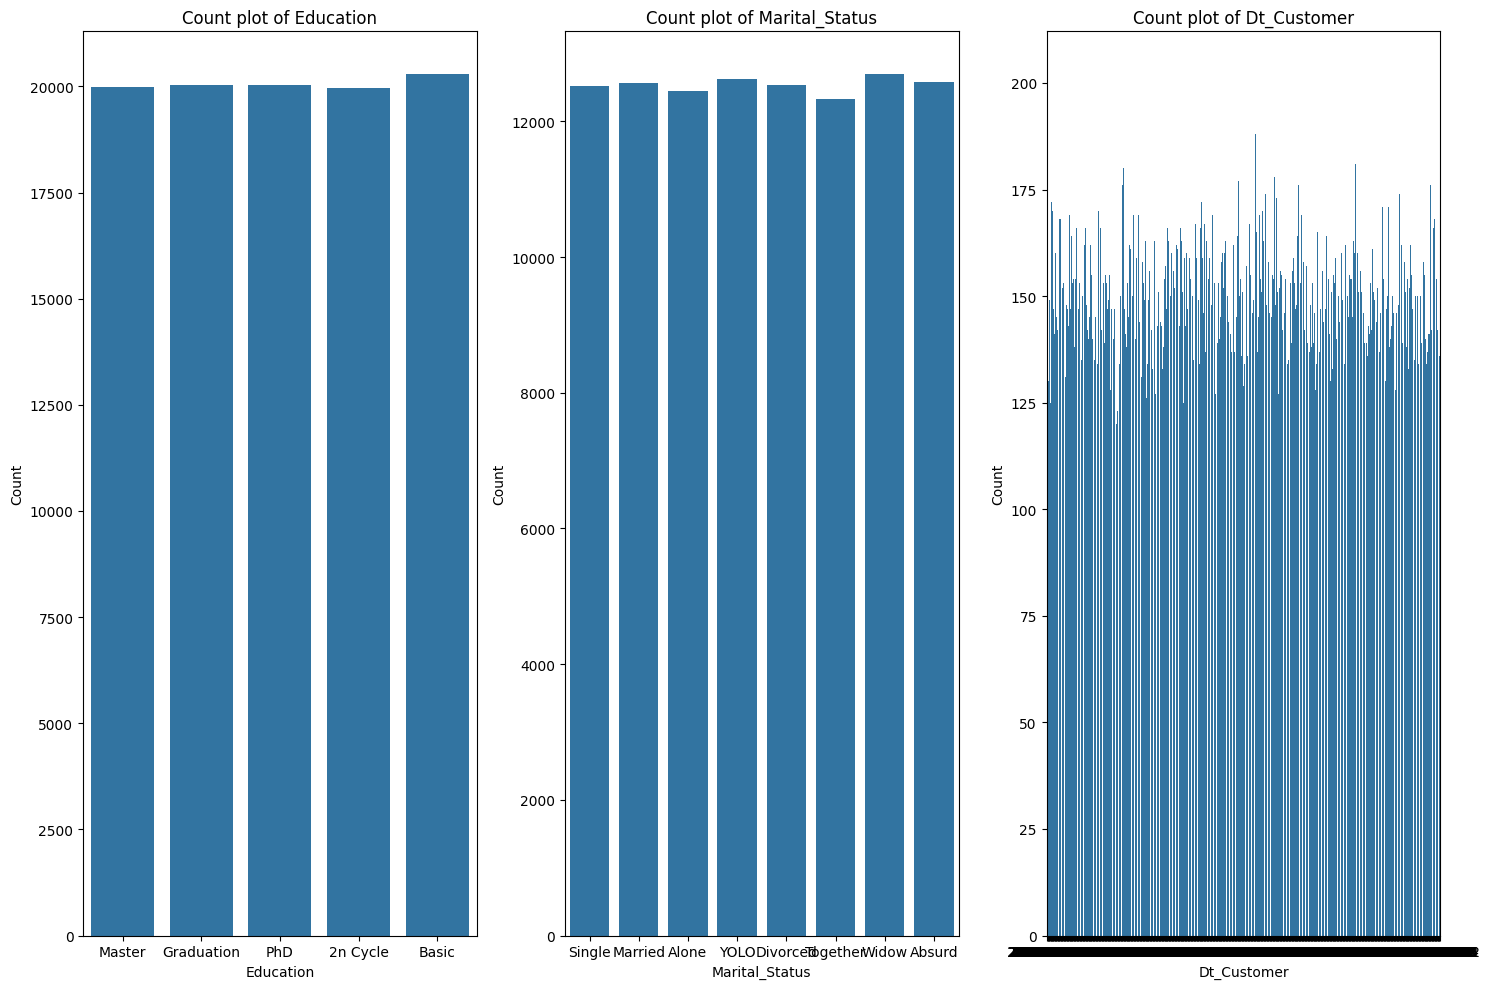

In [13]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(object_cols):
    plt.subplot(1,len(object_cols),i+1)
    sns.countplot(x = col, data = df)
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout();


In [14]:
def education_level(education):
    if education in ['Graduation', 'PhD', 'Master']:
        return 'High'
    elif education in 'Basic':
        return 'Middle'
    else:
        return 'Low'
df['Education_level'] = df['Education'].apply(education_level)

In [15]:
def status(marital_status):
    if marital_status in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living With Others'
df['Status'] = df['Marital_Status'].apply(status)

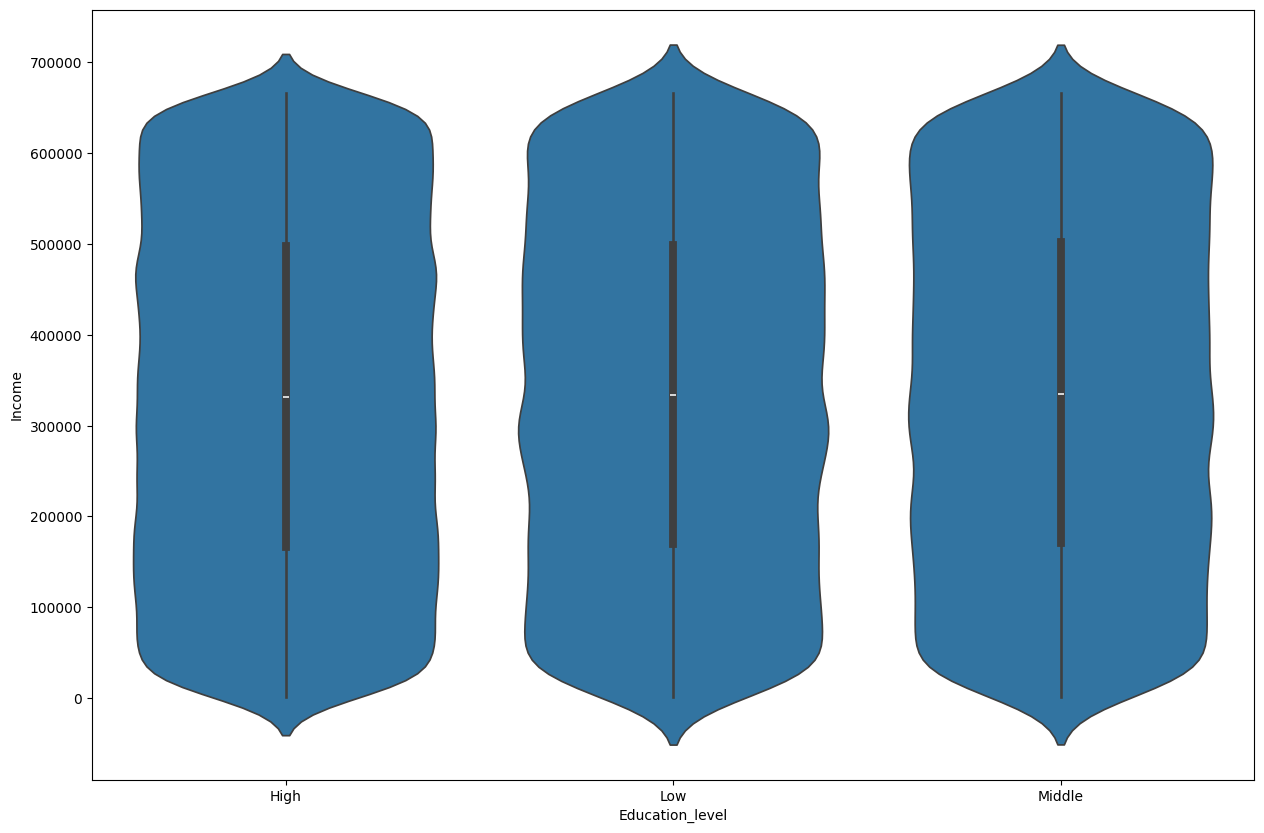

In [16]:
plt.figure(figsize=(15, 10))
sns.violinplot(x = 'Education_level', y = 'Income', data = df);

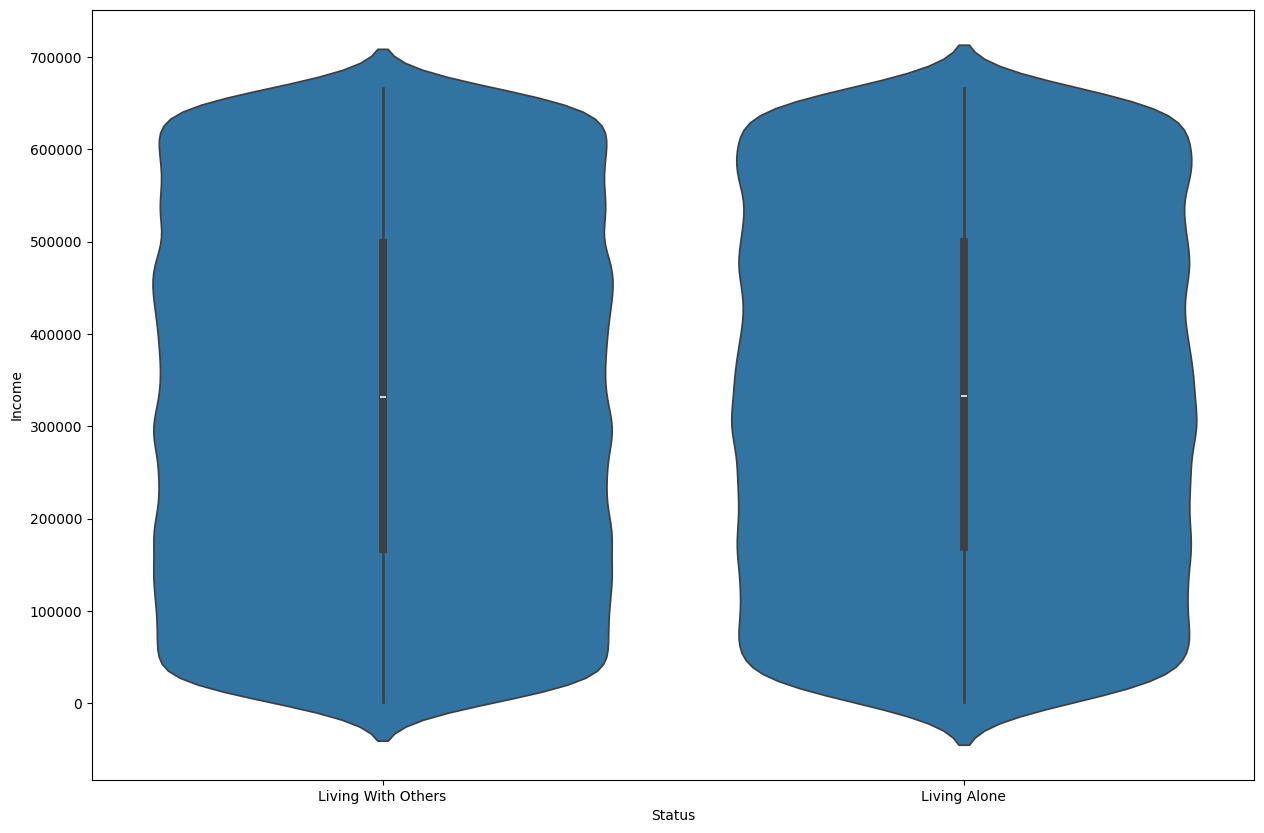

In [17]:
plt.figure(figsize=(15, 10))
sns.violinplot(x = 'Status', y = 'Income', data = df);

In [18]:
for col in df.columns:
    if df[col].dtypes == 'object':
        lae = LabelEncoder()
        df[col] = lae.fit_transform(df[col])

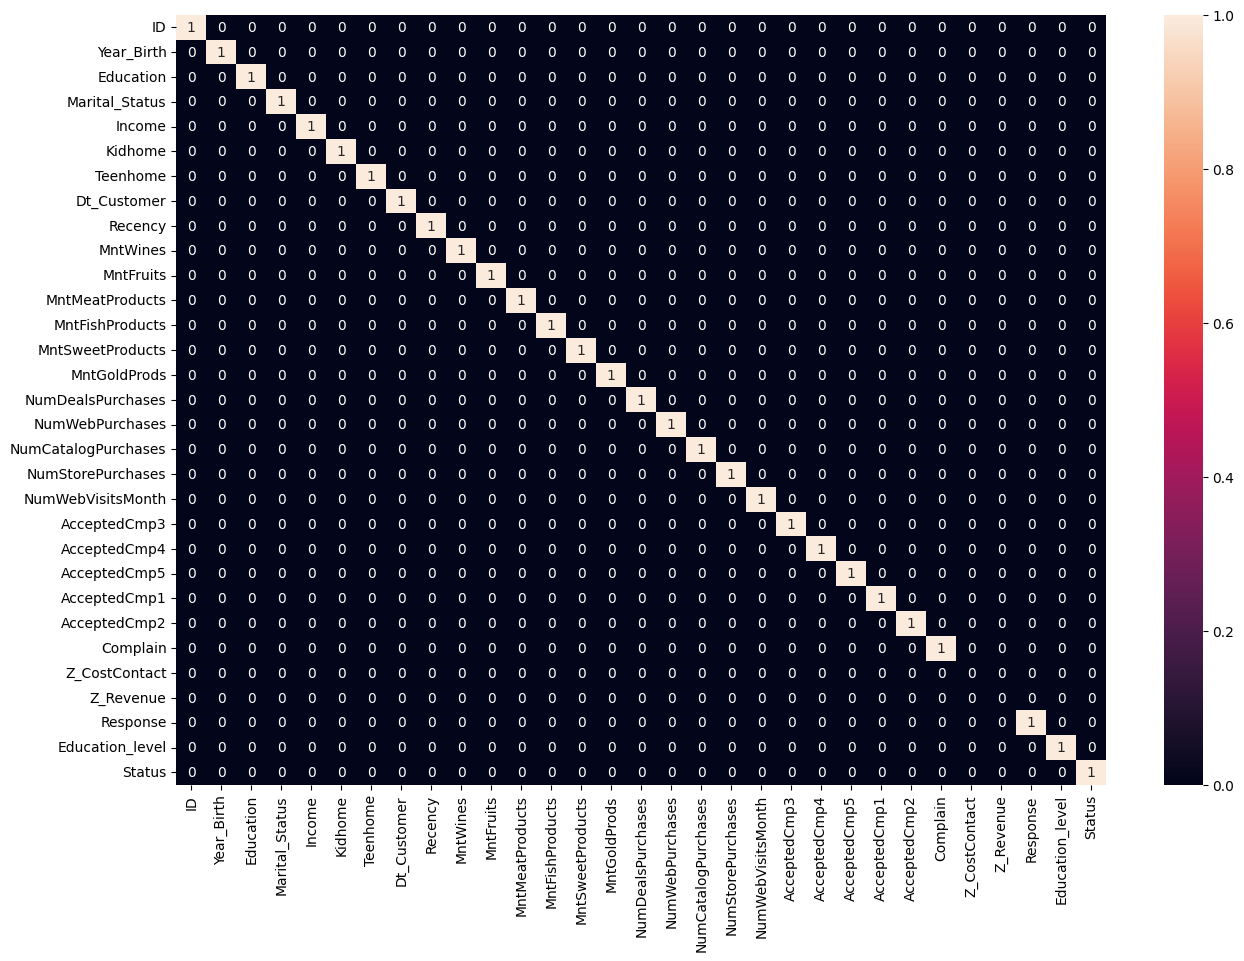

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()> 0.5, annot=True);

In [20]:
df.drop(['Z_CostContact', 'Z_Revenue', 'Dt_Customer'],axis=1, inplace=True)

In [21]:
normal = Normalizer()
df_nm = normal.fit_transform(df)

In [22]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_nm)
pca.explained_variance_ratio_

array([0.95461813, 0.04186354, 0.00306409])

In [23]:
distance = []
for clusters in range(1,20):
    model = KMeans(init = 'k-means++', n_clusters = clusters,max_iter=400, random_state = 10)
    model.fit(df_pca)
    distance.append(model.inertia_)
distance

[8073.705769986524,
 2295.5490077147583,
 1116.0328087284881,
 666.4940278303586,
 442.42608422900526,
 313.2902612597619,
 236.70511111725057,
 186.62595216584197,
 153.89361265941315,
 130.37588982479718,
 112.02784084907154,
 99.4223189653263,
 88.29479606026139,
 79.03496122916323,
 72.96733239934619,
 67.48371292806571,
 63.13790008301752,
 57.35137114851749,
 52.300160702831946]

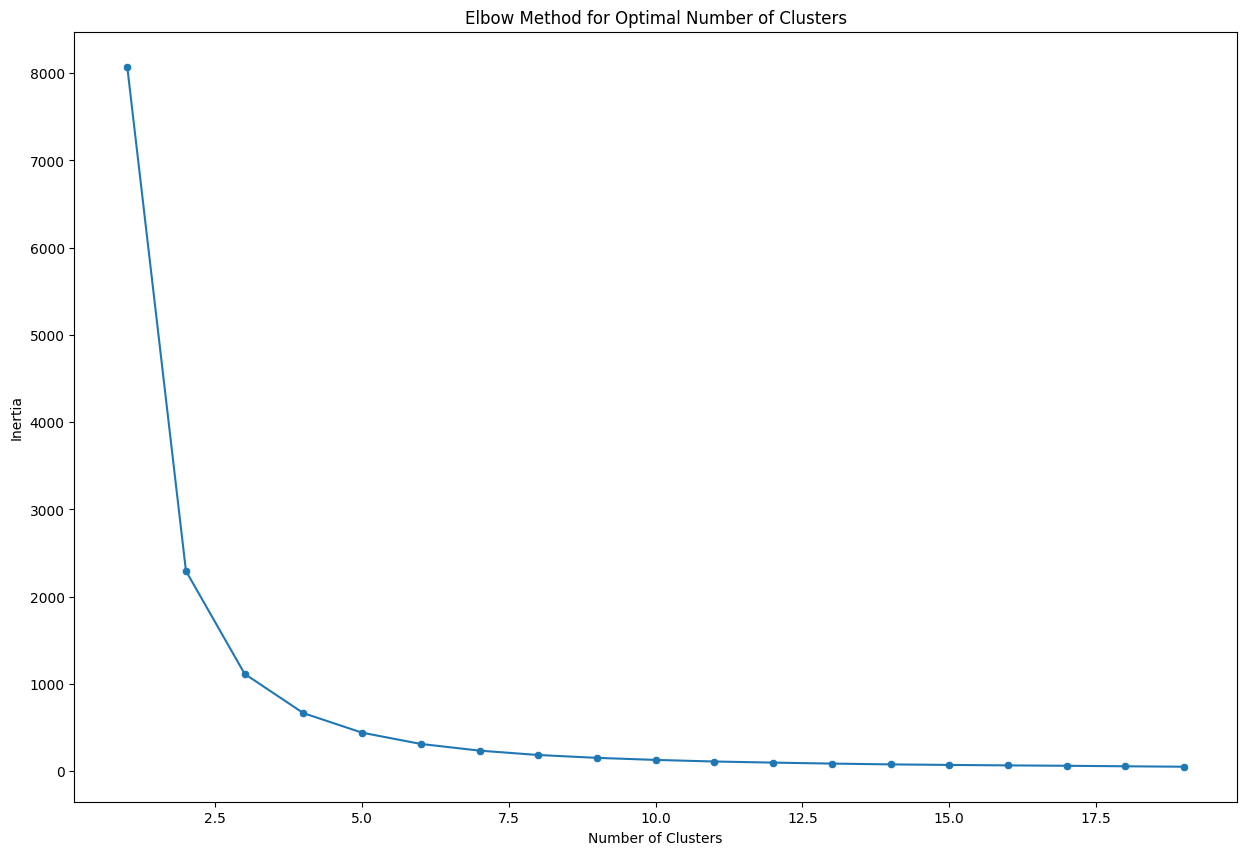

In [24]:
plt.figure(figsize = (15,10))
sns.lineplot(x = range(1,20), y = distance)
sns.scatterplot(x = range(1,20), y = distance)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

In [25]:
model = KMeans(init = 'k-means++',n_clusters = 4,max_iter = 400, random_state = 2)
prediction = model.fit_predict(df_pca)
model.inertia_

666.493246618685

In [26]:
silhouette_score(df_pca, prediction)

np.float64(0.5977638854784039)

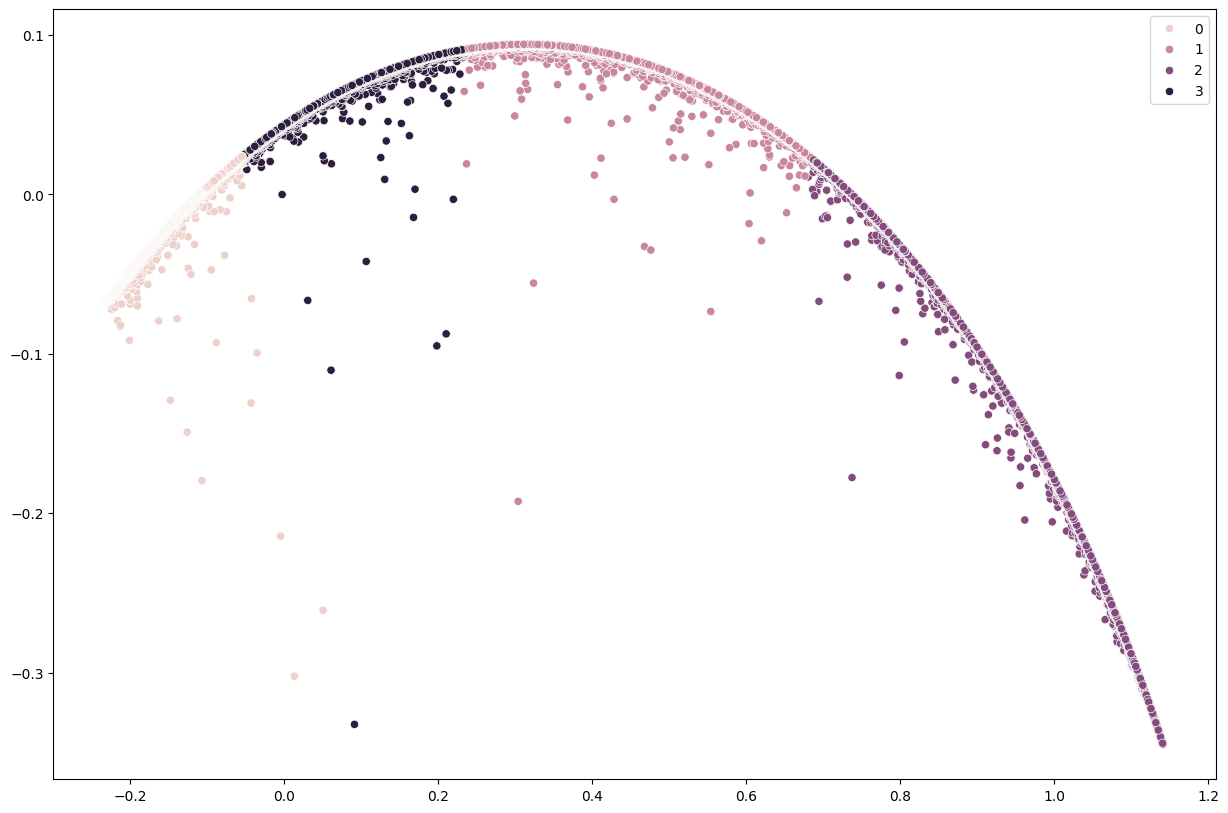

In [27]:
plt.figure(figsize = (15,10))
sns.scatterplot(x =df_pca[:,0], y= df_pca[:,1], hue = prediction)
plt.show()